In [1]:
import fsspec
import xarray as xr
from kerchunk import combine, hdf, netCDF3
import matplotlib.pyplot as plt

In [2]:
def get_refs_hdf(nfile):
    return hdf.SingleHdf5ToZarr(nfile).translate()

def get_refs_ncf3(nfile):
    return netCDF3.NetCDF3ToZarr(nfile).translate()

def combine_refs(refset,**kwargs):
    return combine.MultiZarrToZarr(refset, concat_dims=['time'], **kwargs).translate()

In [10]:
import numpy as np
nfile0 = '/neodc/esacci/aerosol/data/AATSR_ADV/L3/v2.31/MONTHLY/2002/200205-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ADV_MOTNHLY-v2.30.nc'
nfile1 = '/neodc/esacci/aerosol/data/AATSR_ADV/L3/v2.31/MONTHLY/2002/200206-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ADV_MOTNHLY-v2.30.nc'

ds = xr.open_dataset(nfile0)
ds1 = xr.open_dataset(nfile1)


ab = ds.AOD670_mean
np.all(ab!=ab)

<xarray.DataArray 'AOD670_mean' ()>
array(True)

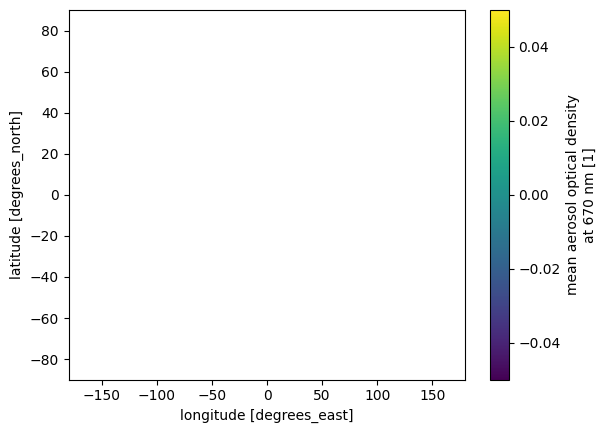

In [4]:
ds1.AOD670_mean.plot()

In [ ]:
nfile_cci1 = '/neodc/esacci/aerosol/data/ATSR2_ADV/L3/v2.31/MONTHLY/1995/199506-ESACCI-L3C_AEROSOL-AER_PRODUCTS-ATSR2-ERS2-ADV_MONTHLY-v2.30.nc'
refs = get_refs_ncf3(nfile_cci1)

In [11]:
ukcp_fileset = """/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_19901201-20001130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20001201-20101130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20101201-20201130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20201201-20301130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20301201-20401130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20501201-20601130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20601201-20701130.nc
/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20701201-20801130.nc""".split('\n')
ukcp_fileset

['/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_19901201-20001130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20001201-20101130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20101201-20201130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20201201-20301130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20301201-20401130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc',
 '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/clt/day/v20190731/clt_rcp85_land-rcm_uk_12km_01_day_20501201-20601130.nc',
 '/badc/ukcp18/data/land-rcm/uk/

In [12]:
ref1 = get_refs(ukcp_fileset[0])

In [13]:
ref2 = get_refs(ukcp_fileset[1])

In [88]:
mzz = combine_refs([ref1,ref2], identical_dims=['ensemble_member_id', 'grid_latitude','grid_longitude'])

In [103]:
ds = xr.open_zarr(fsspec.get_mapper('reference://',fo=mzz2),consolidated=False)

In [104]:
ds.ensemble_member_id.shape, ds.ensemble_member.shape

((1,), (1,))

In [66]:
ref1['refs']['ensemble_member_id/.zattrs']

'{"_ARRAY_DIMENSIONS":["ensemble_member","string27"],"long_name":"ensemble_member_id","units":"1"}'

In [83]:
import json
for var in list(xarr_1.variables):
    attrs = json.loads(ref1['refs'][f'{var}/.zattrs'])
    print(var, attrs['_ARRAY_DIMENSIONS'])

clt ['ensemble_member', 'time', 'projection_y_coordinate', 'projection_x_coordinate']
transverse_mercator []
ensemble_member ['ensemble_member']
time ['time']
time_bnds ['time', 'bnds']
projection_y_coordinate ['projection_y_coordinate']
projection_y_coordinate_bnds ['projection_y_coordinate', 'bnds']
projection_x_coordinate ['projection_x_coordinate']
projection_x_coordinate_bnds ['projection_x_coordinate', 'bnds']
ensemble_member_id ['ensemble_member', 'string27']
grid_latitude ['projection_y_coordinate', 'projection_x_coordinate']
grid_longitude ['projection_y_coordinate', 'projection_x_coordinate']
month_number ['time']
year ['time']
yyyymmdd ['time', 'string64']


In [ ]:
mzz['refs']['grid_latitude/.zattrs']

In [108]:
xarr_1 = xr.open_mfdataset(ukcp_fileset[:2])
xarr_2 = xr.concat([xr.open_dataset(ukcp_fileset[0]), xr.open_dataset(ukcp_fileset[1])], dim='time', data_vars='minimal')

In [109]:
for var in list(xarr_1.variables):
    print(var, xarr_2[var].shape, ds[var].shape)

clt (1, 7200, 112, 82) (1, 7200, 112, 82)
transverse_mercator () ()
ensemble_member (1,) (1,)
time (7200,) (7200,)
time_bnds (7200, 2) (7200, 2)
projection_y_coordinate (112,) (112,)
projection_y_coordinate_bnds (112, 2) (112, 2)
projection_x_coordinate (82,) (82,)
projection_x_coordinate_bnds (82, 2) (82, 2)
ensemble_member_id (1,) (1,)
grid_latitude (112, 82) (112, 82)
grid_longitude (112, 82) (112, 82)
month_number (7200,) (7200,)
year (7200,) (7200,)
yyyymmdd (7200,) (7200,)


In [76]:
xarr_1.grid_latitude.shape

(112, 82)

In [74]:
ds.grid_latitude.shape

(7200, 112, 82)

In [14]:
from pipeline.validate import validate_data
from pipeline.logs import init_logger
testlog = init_logger(1,0,'test')

In [15]:
from pipeline.errors import ShapeMismatchError
import xarray as xr
import fsspec
ds1 = xr.open_zarr(fsspec.get_mapper('reference://',fo=ref1),consolidated=False)
ds2 = xr.open_zarr(fsspec.get_mapper('reference://',fo=ref2),consolidated=False)
identicals = []
for var in ds1.variables:
    if 'time' not in ds1[var].dims:
        try:
            validate_data(ds1, ds2, var, 0, testlog, bypass=True)
            print('Duplicate: ',var)
            identicals.append(var)
        except ShapeMismatchError:
            # Non duplicate
            print('Non-duplicate: ',var)
    else:
        print('Time-dependent: ',var)
mzz2 = combine_refs([ref1,ref2], identical_dims=identicals)

INFO [test]: ensemble_member : Starting growbox data tests for 0
INFO [test]: ensemble_member : Starting growbox data tests for 0
INFO [test]: ensemble_member_id : Starting growbox data tests for 0
INFO [test]: ensemble_member_id : Starting growbox data tests for 0


Time-dependent:  clt
Duplicate:  ensemble_member


WARNING [test]: Max comparison skipped for non-summable values in ensemble_member_id
WARNING [test]: Max comparison skipped for non-summable values in ensemble_member_id
WARNING [test]: Min comparison skipped for non-summable values in ensemble_member_id
WARNING [test]: Min comparison skipped for non-summable values in ensemble_member_id
WARNING [test]: Mean comparison skipped for non-summable values in ensemble_member_id
WARNING [test]: Mean comparison skipped for non-summable values in ensemble_member_id
INFO [test]: grid_latitude : Starting growbox data tests for 0
INFO [test]: grid_latitude : Starting growbox data tests for 0
INFO [test]: grid_longitude : Starting growbox data tests for 0
INFO [test]: grid_longitude : Starting growbox data tests for 0
INFO [test]: projection_x_coordinate : Starting growbox data tests for 0
INFO [test]: projection_x_coordinate : Starting growbox data tests for 0
INFO [test]: projection_x_coordinate_bnds : Starting growbox data tests for 0
INFO [test

Duplicate:  ensemble_member_id
Duplicate:  grid_latitude
Duplicate:  grid_longitude
Time-dependent:  month_number
Duplicate:  projection_x_coordinate
Duplicate:  projection_x_coordinate_bnds
Duplicate:  projection_y_coordinate
Duplicate:  projection_y_coordinate_bnds
Time-dependent:  time
Time-dependent:  time_bnds
nan
Duplicate:  transverse_mercator
Time-dependent:  year
Time-dependent:  yyyymmdd


<xarray.DataArray 'transverse_mercator' (time: 7200)>
array([-2147483647, -2147483647, -2147483647, ..., -2147483647,
       -2147483647, -2147483647], dtype=int32)
Coordinates:
  * time          (time) object 1980-12-01 12:00:00 ... 2000-11-30 12:00:00
    month_number  (time) int32 dask.array<chunksize=(3600,), meta=np.ndarray>
    year          (time) int32 dask.array<chunksize=(3600,), meta=np.ndarray>
    yyyymmdd      (time) |S64 dask.array<chunksize=(3600,), meta=np.ndarray>
Attributes:
    grid_mapping_name:                 transverse_mercator
    longitude_of_prime_meridian:       0.0
    semi_major_axis:                   6377563.396
    semi_minor_axis:                   6356256.909
    longitude_of_central_meridian:     -2.0
    latitude_of_projection_origin:     49.0
    false_easting:                     400000.0
    false_northing:                    -100000.0
    scale_factor_at_central_meridian:  0.9996012717

In [120]:
class Args:
    def __init__(self):
        self.bypass = True

In [16]:
allfile = "/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/CMIP_AWI_AWI-CM-1-1-MR_historical_r1i1p1f1_Amon_uas_gn_v20200511/allfiles.txt"
with open(allfile) as f:
    fileset = [r.strip() for r in f.readlines()]

In [17]:
import xarray as xr
ds_set = []
for f in fileset:
    ds_set.append(xr.open_dataset(f))
ds = xr.concat(ds_set, dim='time',data_vars='minimal')

In [18]:
ds.lon_bnds.shape

(384, 2)

In [1]:
kfile1 = "/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/CMIP_AWI_AWI-CM-1-1-MR_historical_r1i1p1f1_Amon_uas_gn_v20200511/cache/0.json"
kfile2 = kfile1.replace("0.json", "1.json")

In [18]:
from pipeline.validate import open_kerchunk
from pipeline.logs import FalseLogger
import fsspec
import xarray as xr

kfile1 = "/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/CMIP_AWI_AWI-CM-1-1-MR_historical_r1i1p1f1_Amon_uas_gn_v20200511/kerchunk-1a.json"

kf1 = open_kerchunk(kfile1, FalseLogger())
mapper = fsspec.get_mapper('reference://',fo=kfile1, remote_protocol='https')
kf2 = xr.open_zarr(mapper, consolidated=False)

In [20]:
kf2.time.sel(time='1850-01-16')

<xarray.DataArray 'time' (time: 1)>
array(['1850-01-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    height   float64 ...
  * time     (time) datetime64[ns] 1850-01-16T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [11]:
kf2.lon_bnds.compute()

<xarray.DataArray 'lon_bnds' (lon: 384, bnds: 2)>
array([[ -0.46875,   0.46875],
       [  0.46875,   1.40625],
       [  1.40625,   2.34375],
       [  2.34375,   3.28125],
       [  3.28125,   4.21875],
       [  4.21875,   5.15625],
       [  5.15625,   6.09375],
       [  6.09375,   7.03125],
       [  7.03125,   7.96875],
       [  7.96875,   8.90625],
       [  8.90625,   9.84375],
       [  9.84375,  10.78125],
       [ 10.78125,  11.71875],
       [ 11.71875,  12.65625],
       [ 12.65625,  13.59375],
       [ 13.59375,  14.53125],
       [ 14.53125,  15.46875],
       [ 15.46875,  16.40625],
       [ 16.40625,  17.34375],
       [ 17.34375,  18.28125],
...
       [340.78125, 341.71875],
       [341.71875, 342.65625],
       [342.65625, 343.59375],
       [343.59375, 344.53125],
       [344.53125, 345.46875],
       [345.46875, 346.40625],
       [346.40625, 347.34375],
       [347.34375, 348.28125],
       [348.28125, 349.21875],
       [349.21875, 350.15625],
       [350.15625, 351.09375],
       [351.09375, 352.03125],
       [352.03125, 352.96875],
       [352.96875, 353.90625],
       [353.90625, 354.84375],
       [354.84375, 355.78125],
       [355.78125, 356.71875],
       [356.71875, 357.65625],
       [357.65625, 358.59375],
       [358.59375, 359.53125]])
Coordinates:
    height   float64 10.0
  * lon      (lon) float64 6.946e-310 6.946e-310 ... 2.451e+198 4.572e+228
Dimensions without coordinates: bnds

In [13]:
import numpy as np
kf1 = np.array(kf1.lon_bnds)
kf2 = np.array(kf2.lon_bnds)

In [16]:
np.array_equal(kf1, kf2)

True

In [46]:
import os
ingest_file = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/groups/CMIP6_rel1_6233/proj_codes_complete_ingest.txt'
in_place = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/complete/CMIP6_rel1_6233'
with open(ingest_file) as f:
    datasets = [f'{in_place}/{r.strip()}_kr1.0.json' for r in f.readlines()]

for d in datasets[3:8]:
    os.system(f'cp {d} {d.replace("CMIP6_rel1_6233","sample")}')

In [ ]:
for x, d in enumerate(datasets):
    with open(d) as f:
        print(x, len(f.readlines()))

In [29]:
path = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233'
kfile0 = f'{path}/CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_huss_gn_v20201013/cache/0.json'
kfile0a = f'{path}/CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_huss_gn_v20201013/cache/0a.json'
kfile1 = f'{path}/CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_huss_gn_v20201013/cache/1.json'
print(kfile0)

/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_huss_gn_v20201013/cache/0.json


In [ ]:
import fsspec
import xarray as xr

mapper = fsspec.get_mapper('reference://',fo=kfile0, remote_protocol='https')
kf = xr.open_zarr(mapper, consolidated=False)
kf.lata

In [ ]:
import fsspec
import xarray as xr

mapper = fsspec.get_mapper('reference://',fo=kfile0a, remote_protocol='file')
kfa = xr.open_zarr(mapper, consolidated=False)
kfa.lat

In [5]:
ncf1 = '/badc/cmip6/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/3hr/huss/gn/v20201013/huss_3hr_TaiESM1_historical_r1i1p1f1_gn_185001010000-185912312230.nc'
ds = xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/3hr/huss/gn/v20201013/huss_3hr_TaiESM1_historical_r1i1p1f1_gn_185001010000-185912312230.nc')

In [ ]:
from kerchunk.hdf import SingleHdf5ToZarr
import xarray as xr
import fsspec
import json
ncf1 = '/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/huss/day/v20190731/huss_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc'
refs = SingleHdf5ToZarr(ncf1, inline_threshold=65).translate()
refs['refs']['time_bnds/.zarray']

In [ ]:
import os
os.environ['BREAKER'] = 'false'
ds = xr.open_zarr(fsspec.get_mapper('reference://',fo=refs), consolidated=False)

In [ ]:
os.environ['BREAKER'] = 'true'
ds.time_bnds.compute()

In [ ]:
kfile2 = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_huss_gn_v20201013/kerchunk-1a.json'
ds2 = xr.open_zarr(fsspec.get_mapper('reference://',fo=kfile2, remote_protocol='https'), consolidated=False)

In [38]:
import json
import os
os.system(f'rm {kfile0a}')
with open(kfile0a,'w') as f:
    f.write(json.dumps(refs))

In [28]:
refs['refs']['lat/0']

['/badc/cmip6/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/3hr/huss/gn/v20201013/huss_3hr_TaiESM1_historical_r1i1p1f1_gn_185001010000-185912312230.nc',
 41084,
 1536]

In [24]:
import glob
import os
complete = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/complete/CMIP6_rel1_6233/*.json'

paths = glob.glob(complete)
for p in paths:
    if not p.split('/')[-1].startswith('CMIP6_'):
        os.system(f"mv {p} {p.replace('6233/','6233/CMIP6_')}")

In [ ]:
incomplete = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/groups/CMIP6_rel1_6233/proj_codes_cmip6_fail.txt'
with open(incomplete) as f:
    keys = [r.strip() for r in f.readlines()]

for k in keys:
    print(k)
    complete_1057[k] = 'FAIL'

In [18]:
PASS, FAIL = 0, 0
day = 0
for key in complete_1057.keys():
    if complete_1057[key] == 'FAIL':
        FAIL += 1
        if 'day' in key:
            day += 1
    else:
        PASS += 1

In [19]:
FAIL, PASS, day

(326, 731, 257)

In [26]:
import xarray as xr
allfile = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/in_progress/CMIP6_rel1_6233/ScenarioMIP_NCC_NorESM2-MM_ssp126_r1i1p1f1_day_psl_gn_v20191108/allfiles.txt'

with open(allfile) as f:
    xrobjs = [r.strip() for r in f.readlines()]

for x in xrobjs:
    ds = xr.open_dataset(x)
    print(ds.time.shape)

(2190,)
(3650,)
(3650,)
(3650,)
(3650,)
(3650,)
(3650,)
(3650,)
(3650,)


In [2]:
import xarray as xr
nfile = '/badc/ukcp18/data/land-cpm/uk/5km/rcp85/01/tas/day/v20210615/tas_rcp85_land-cpm_uk_5km_01_day_20201201-20301130.nc'
ds = xr.open_dataset(nfile)
ds

<xarray.Dataset>
Dimensions:                       (ensemble_member: 1, time: 3600,
                                   projection_y_coordinate: 244,
                                   projection_x_coordinate: 180, bnds: 2)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) object 2020-12-01 12:00:00 ... 2030-...
  * projection_y_coordinate       (projection_y_coordinate) float64 -3.25e+04...
  * projection_x_coordinate       (projection_x_coordinate) float64 -1.975e+0...
    ensemble_member_id            (ensemble_member) |S27 ...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int32 ...
    year                          (time) int32 ...
    yyyymmdd                      (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    tas                           (ensemble_member, time, projection_y_coordinate, projection_x_coordinate) float32 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) object ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2021-06-09T16:58:45
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      5km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - Regridded 2.2km convection-per...
    version:         v20210615
    Conventions:     CF-1.7

In [3]:
ds.transverse_mercator

<xarray.DataArray 'transverse_mercator' ()>
[1 values with dtype=int32]
Attributes:
    grid_mapping_name:                 transverse_mercator
    longitude_of_prime_meridian:       0.0
    semi_major_axis:                   6377563.396
    semi_minor_axis:                   6356256.909
    longitude_of_central_meridian:     -2.0
    latitude_of_projection_origin:     49.0
    false_easting:                     400000.0
    false_northing:                    -100000.0
    scale_factor_at_central_meridian:  0.9996012717